In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
df=pd.read_excel("Car Sales Data.xlsx")

In [57]:
df

,Model (Brand),Body type,2021-22 (Q1+Q2),2021-22 (Q3+Q4),2022-23 (Q1+Q2),2022-23 (Q3+Q4),Car Average price (in Lacs),Total sale,Car Average price
0,Amaze (Honda),Sedan,15673,20800,21793,26646,8.3,84912,830000.0
1,City (Honda),Sedan,17106,20031,19277,15761,13.7,72175,1370000.0
2,Alcazar (Hyundai),MUV,12861,13033,14190,12506,19.0,52590,1900000.0
3,Creta (Hyundai),SUV,63721,54371,75482,74890,15.0,268464,1500000.0
4,i20 (Hyundai),Hatch,33786,28983,38797,43815,9.7,145381,970000.0
5,Venue (Hyundai),SUV,45436,59655,61286,59367,10.5,225744,1050000.0
6,Verna (Hyundai),Sedan,10718,9334,9230,10539,14.2,39821,1420000.0
7,Compass (Jeep),SUV,5503,6446,4946,3052,25.0,19947,2500000.0
8,Seltos (Kia),SUV,46097,49832,50040,50092,15.3,196061,1530000.0
9,Sonet (Kia),SUV,40195,33669,45102,48994,11.4,167960,1140000.0


In [3]:
df.head()

,Model (Brand),Body type,2021-22 (Q1+Q2),2021-22 (Q3+Q4),2022-23 (Q1+Q2),2022-23 (Q3+Q4),Car Average price (in Lacs)
0,Amaze (Honda),Sedan,15673,20800,21793,26646,8.3
1,City (Honda),Sedan,17106,20031,19277,15761,13.7
2,Alcazar (Hyundai),MUV,12861,13033,14190,12506,19.0
3,Creta (Hyundai),SUV,63721,54371,75482,74890,15.0
4,i20 (Hyundai),Hatch,33786,28983,38797,43815,9.7


In [4]:
df.describe()

,2021-22 (Q1+Q2),2021-22 (Q3+Q4),2022-23 (Q1+Q2),2022-23 (Q3+Q4),Car Average price (in Lacs)
count,33.000000,33.000000,33.000000,33.000000,33.000000
mean,23625.969697,28726.575758,32860.545455,33127.393939,13.472727
std,19517.567506,21994.220619,25258.005180,27634.599095,4.255825
min,0.000000,4527.000000,4946.000000,3052.000000,8.000000
25%,9863.000000,13033.000000,13366.000000,12113.000000,10.500000
50%,16743.000000,20162.000000,21793.000000,19471.000000,13.700000
75%,40195.000000,33669.000000,45102.000000,48994.000000,15.300000
max,63721.000000,77934.000000,96758.000000,106143.000000,25.000000


In [5]:
df['Total sale']= df['2021-22 (Q1+Q2)']+df['2021-22 (Q3+Q4)']+df['2022-23 (Q1+Q2)']+df['2022-23 (Q3+Q4)']

In [6]:
df['Car Average price']=df['Car Average price (in Lacs)']*100000

In [7]:
df.head()

,Model (Brand),Body type,2021-22 (Q1+Q2),2021-22 (Q3+Q4),2022-23 (Q1+Q2),2022-23 (Q3+Q4),Car Average price (in Lacs),Total sale,Car Average price
0,Amaze (Honda),Sedan,15673,20800,21793,26646,8.3,84912,830000.0
1,City (Honda),Sedan,17106,20031,19277,15761,13.7,72175,1370000.0
2,Alcazar (Hyundai),MUV,12861,13033,14190,12506,19.0,52590,1900000.0
3,Creta (Hyundai),SUV,63721,54371,75482,74890,15.0,268464,1500000.0
4,i20 (Hyundai),Hatch,33786,28983,38797,43815,9.7,145381,970000.0


In [8]:
x=df.copy(deep=True)

In [9]:
x.drop(['Model (Brand)','2021-22 (Q1+Q2)','2021-22 (Q3+Q4)','2022-23 (Q1+Q2)','2022-23 (Q3+Q4)','Car Average price (in Lacs)'], axis=1,inplace=True)

In [10]:
x.head()

,Body type,Total sale,Car Average price
0,Sedan,84912,830000.0
1,Sedan,72175,1370000.0
2,MUV,52590,1900000.0
3,SUV,268464,1500000.0
4,Hatch,145381,970000.0


In [29]:
import seaborn as sns

In [37]:
keys=x['Body type']
data=x['Total sale']

In [52]:
suv=df[df['Body type']=='SUV']['Total sale']
muv=df[df['Body type']=='MUV']['Total sale']
sedan=df[df['Body type']=='Sedan']['Total sale']
hatch=df[df['Body type']=='Hatch']['Total sale']


In [53]:
data=[suv.sum(),muv.sum(),sedan.sum(),hatch.sum()]
keys=['SUV','MUV','Sedan','Hatch']

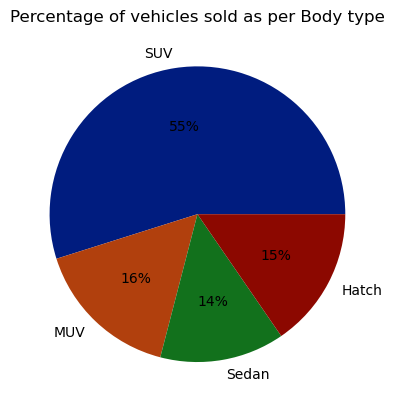

In [62]:
palette_color = sns.color_palette('dark')
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.title("Percentage of vehicles sold as per Body type")
plt.show() 

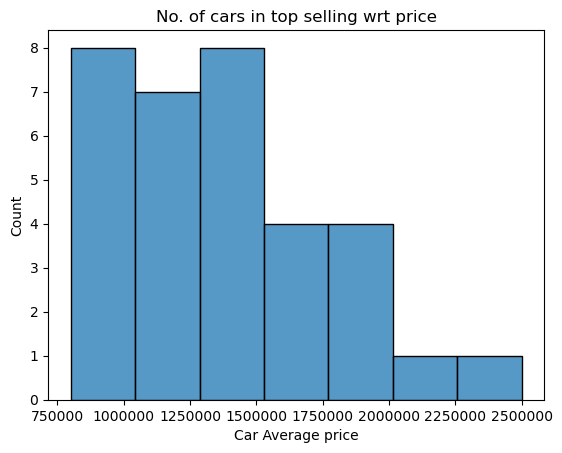

In [63]:
sns.histplot(x['Car Average price'])
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.title('No. of cars in top selling wrt price')
plt.show()

In [11]:
newx=pd.get_dummies(x, prefix=None, dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

In [12]:
newx.head()

,Total sale,Car Average price,Body type_Hatch,Body type_MUV,Body type_SUV,Body type_Sedan
0,84912,830000.0,0,0,0,1
1,72175,1370000.0,0,0,0,1
2,52590,1900000.0,0,1,0,0
3,268464,1500000.0,0,0,1,0
4,145381,970000.0,1,0,0,0


In [13]:
newx["Total sale"]=newx["Total sale"]-newx["Total sale"].mean()
newx["Car Average price"]=newx["Car Average price"]-newx["Car Average price"].mean()

In [14]:
newx.describe()

,Total sale,Car Average price,Body type_Hatch,Body type_MUV,Body type_SUV,Body type_Sedan
count,3.300000e+01,3.300000e+01,33.000000,33.000000,33.000000,33.000000
mean,-3.968704e-12,-7.055474e-12,0.090909,0.181818,0.545455,0.181818
std,9.207517e+04,4.255825e+05,0.291937,0.391675,0.505650,0.391675
min,-9.839348e+04,-5.472727e+05,0.000000,0.000000,0.000000,0.000000
25%,-6.575948e+04,-2.972727e+05,0.000000,0.000000,0.000000,0.000000
50%,-3.533748e+04,2.272727e+04,0.000000,0.000000,1.000000,0.000000
75%,4.961952e+04,1.827273e+05,0.000000,0.000000,1.000000,0.000000
max,2.180145e+05,1.152727e+06,1.000000,1.000000,1.000000,1.000000


In [15]:
pca=PCA(2)
pcx=pca.fit_transform(newx)

In [16]:
pcx.shape

(33, 2)

In [17]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++',random_state=50)
    km.fit(pcx)
    wcss.append(km.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


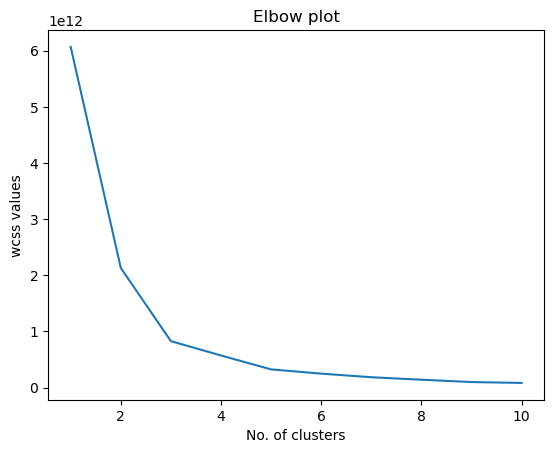

In [18]:
plt.plot(range(1,11),wcss)
plt.title("Elbow plot")
plt.xlabel("No. of clusters")
plt.ylabel("wcss values")
plt.show()

In [19]:
km_model=KMeans(n_clusters=3,init='k-means++',random_state=50)
y_means=km_model.fit_predict(newx)

In [20]:
y_means

array([1, 0, 2, 0, 1, 1, 0, 2, 0, 1, 0, 0, 1, 2, 1, 1, 1, 1, 0, 1, 0, 2,
       1, 1, 1, 0, 0, 1, 2, 1, 2, 0, 0])

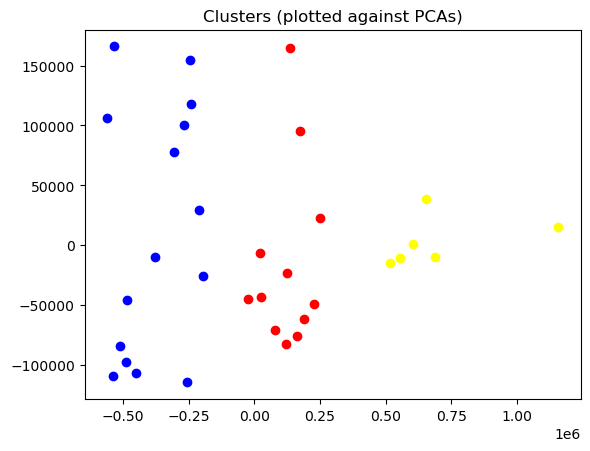

In [64]:
label0 = pcx[y_means == 0]
label1 = pcx[y_means == 1]
label2 = pcx[y_means == 2]
plt.scatter(label0[:,0] , label0[:,1] , color = 'red')
plt.scatter(label1[:,0] , label1[:,1] , color = 'blue')
plt.scatter(label2[:,0] , label2[:,1] , color = 'yellow')
plt.title('Clusters (plotted against PCAs)')
plt.show()

In [80]:
segment_1=df[y_means==0].copy(deep=True)
segment_2=df[y_means==1].copy(deep=True)
segment_3=df[y_means==2].copy(deep=True)
segment_1.reset_index(drop=True,inplace=True)
segment_2.reset_index(drop=True,inplace=True)
segment_3.reset_index(drop=True,inplace=True)

In [81]:
segment_1.drop(['2021-22 (Q1+Q2)','2021-22 (Q3+Q4)','2022-23 (Q1+Q2)','2022-23 (Q3+Q4)','Car Average price (in Lacs)'], axis=1,inplace=True)
segment_2.drop(['2021-22 (Q1+Q2)','2021-22 (Q3+Q4)','2022-23 (Q1+Q2)','2022-23 (Q3+Q4)','Car Average price (in Lacs)'], axis=1,inplace=True)
segment_3.drop(['2021-22 (Q1+Q2)','2021-22 (Q3+Q4)','2022-23 (Q1+Q2)','2022-23 (Q3+Q4)','Car Average price (in Lacs)'], axis=1,inplace=True)

In [82]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [90]:
segment_1.head()

,Model (Brand),Body type,Total sale,Car Average price
0,City (Honda),Sedan,72175,1370000.00000
1,Creta (Hyundai),SUV,268464,1500000.00000
2,Verna (Hyundai),Sedan,39821,1420000.00000
3,Seltos (Kia),SUV,196061,1530000.00000
4,Carens (Kia),MUV,83003,1470000.00000


In [84]:
segment_1[['Total sale','Car Average price']].describe()

,Total sale,Car Average price
count,12.00000,12.00000
mean,91473.08333,1470000.00000
std,73887.77963,85811.63303
min,24335.00000,1320000.00000
25%,39528.00000,1407500.00000
50%,73844.00000,1485000.00000
75%,111422.75000,1530000.00000
max,268464.00000,1600000.00000


In [85]:
segment_2.head()

,Model (Brand),Body type,Total sale,Car Average price
0,Amaze (Honda),Sedan,84912,830000.00000
1,i20 (Hyundai),Hatch,145381,970000.00000
2,Venue (Hyundai),SUV,225744,1050000.00000
3,Sonet (Kia),SUV,167960,1140000.00000
4,XUV300 (Mahindra),SUV,111646,1150000.00000


In [86]:
segment_2[['Total sale','Car Average price']].describe()

,Total sale,Car Average price
count,15.00000,15.00000
mean,165940.80000,972000.00000
std,100059.36881,138625.90976
min,29479.00000,800000.00000
25%,77181.50000,840000.00000
50%,145381.00000,970000.00000
75%,252118.50000,1105000.00000
max,336355.00000,1150000.00000


In [87]:
segment_3.head()

,Model (Brand),Body type,Total sale,Car Average price
0,Alcazar (Hyundai),MUV,52590,1900000.00000
1,Compass (Jeep),SUV,19947,2500000.00000
2,XUV700 (Mahindra),SUV,92734,2000000.00000
3,Hector (MG),SUV,52581,1860000.00000
4,Harrier (Tata),SUV,59726,1950000.00000


In [88]:
segment_3[['Total sale','Car Average price']].describe()

,Total sale,Car Average price
count,6.00000,6.00000
mean,53074.50000,2040000.00000
std,23933.24951,233837.55045
min,19947.00000,1860000.00000
25%,43797.00000,1912500.00000
50%,52585.50000,1975000.00000
75%,57942.00000,2022500.00000
max,92734.00000,2500000.00000


In [91]:
seg_sales=[segment_1['Total sale'].sum(),segment_2['Total sale'].sum(),segment_3['Total sale'].sum()]

In [92]:
seg_sales

[1097677, 2489112, 318447]

In [93]:
segment_1['Revenue'] = segment_1['Total sale']*segment_1['Car Average price']
segment_2['Revenue'] = segment_2['Total sale']*segment_2['Car Average price']
segment_3['Revenue'] = segment_3['Total sale']*segment_3['Car Average price']

In [111]:
Revenue = {'Segment':['Segment 1','Segment 2','Segment 3'], 'Revenue':[segment_1.Revenue.sum(),segment_2.Revenue.sum(),segment_3.Revenue.sum()]}

In [116]:
Rev =pd.DataFrame(data=Revenue)
Rev['Total sales amount (in Crore)']=Rev['Revenue']/10000000
Rev['Total sale']=seg_sales
Rev.drop('Revenue',axis=1, inplace=True)

In [117]:
Rev

,Segment,Total sales amount (in Crore),Total sale
0,Segment 1,162454.99300,1097677
1,Segment 2,245405.55000,2489112
2,Segment 3,63248.69300,318447
